# stream 출력 방법
- stream_mode = "update", stream_mode = "value" 코드를 이용한 stream 출력은 노드가 끝난 후 그래프 state를 출력한다.
- stream_mode = "custom"과 from langgraph.types import StreamWriter를 이용하면 노드가 진행하는 동안 stream출력을 할 수 있다.

# 역질문 구현 방법
- Human in the loop문서를 참고하여 from langgraph.types import interrupt를 사용하였다.
```
ai_chat = "브랜드를 입력하세요"
    try:
        model_answer = interrupt(ai_chat)
    except GraphInterrupt:
        writer(
            {
                "currentNode": "refine_question",
                "ai_chat": ai_chat,
                "keywords": [],
                "suggestQuestions": [],
                "sessionId": state.get("sessionId"),
                "messageId": state.get("messageId"),
            }
        )
        raise
```
- 인터럽트가 발생한다면 writer를 이용해서 stream출력을 하게 만들었다.
- 역질문에 대응하는 대답은 model_answer에 저장된다.
- model_answer을 이용해서 추가 정보를 얻는다.

# 문제점
- interrupt로 중단된 그래프에 다시 접근하기 위해서는 config 파라미터를 이용해야 한다.
```
app.astream(
                input={
                    "question": _chat_input.question,
                    "sessionId": _chat_input.session_id, 
                    "messageId": messageId,
                    "brand": _chat_input.brand,
                    "model": _chat_input.model,
                    },
                config=thread,
                stream_mode=["custom"]
            )
```
- 같은 config를 사용하면 state가 유지되는 문제가 있다. (brand를 입력하지 않았음에도 이전 채팅에서 얻은 brand가 유지됨)

# 해결 방안
- 마지막 node에서 모든 state를 empty값으로 바꾼다.
- Human in the loop방식이 아닌 역질문 노드에서 바로 END로 종료되게 만든다 -> 매번 input마다 config를 바꿀 수 있어 state가 유지 되는 문제 해결 가능


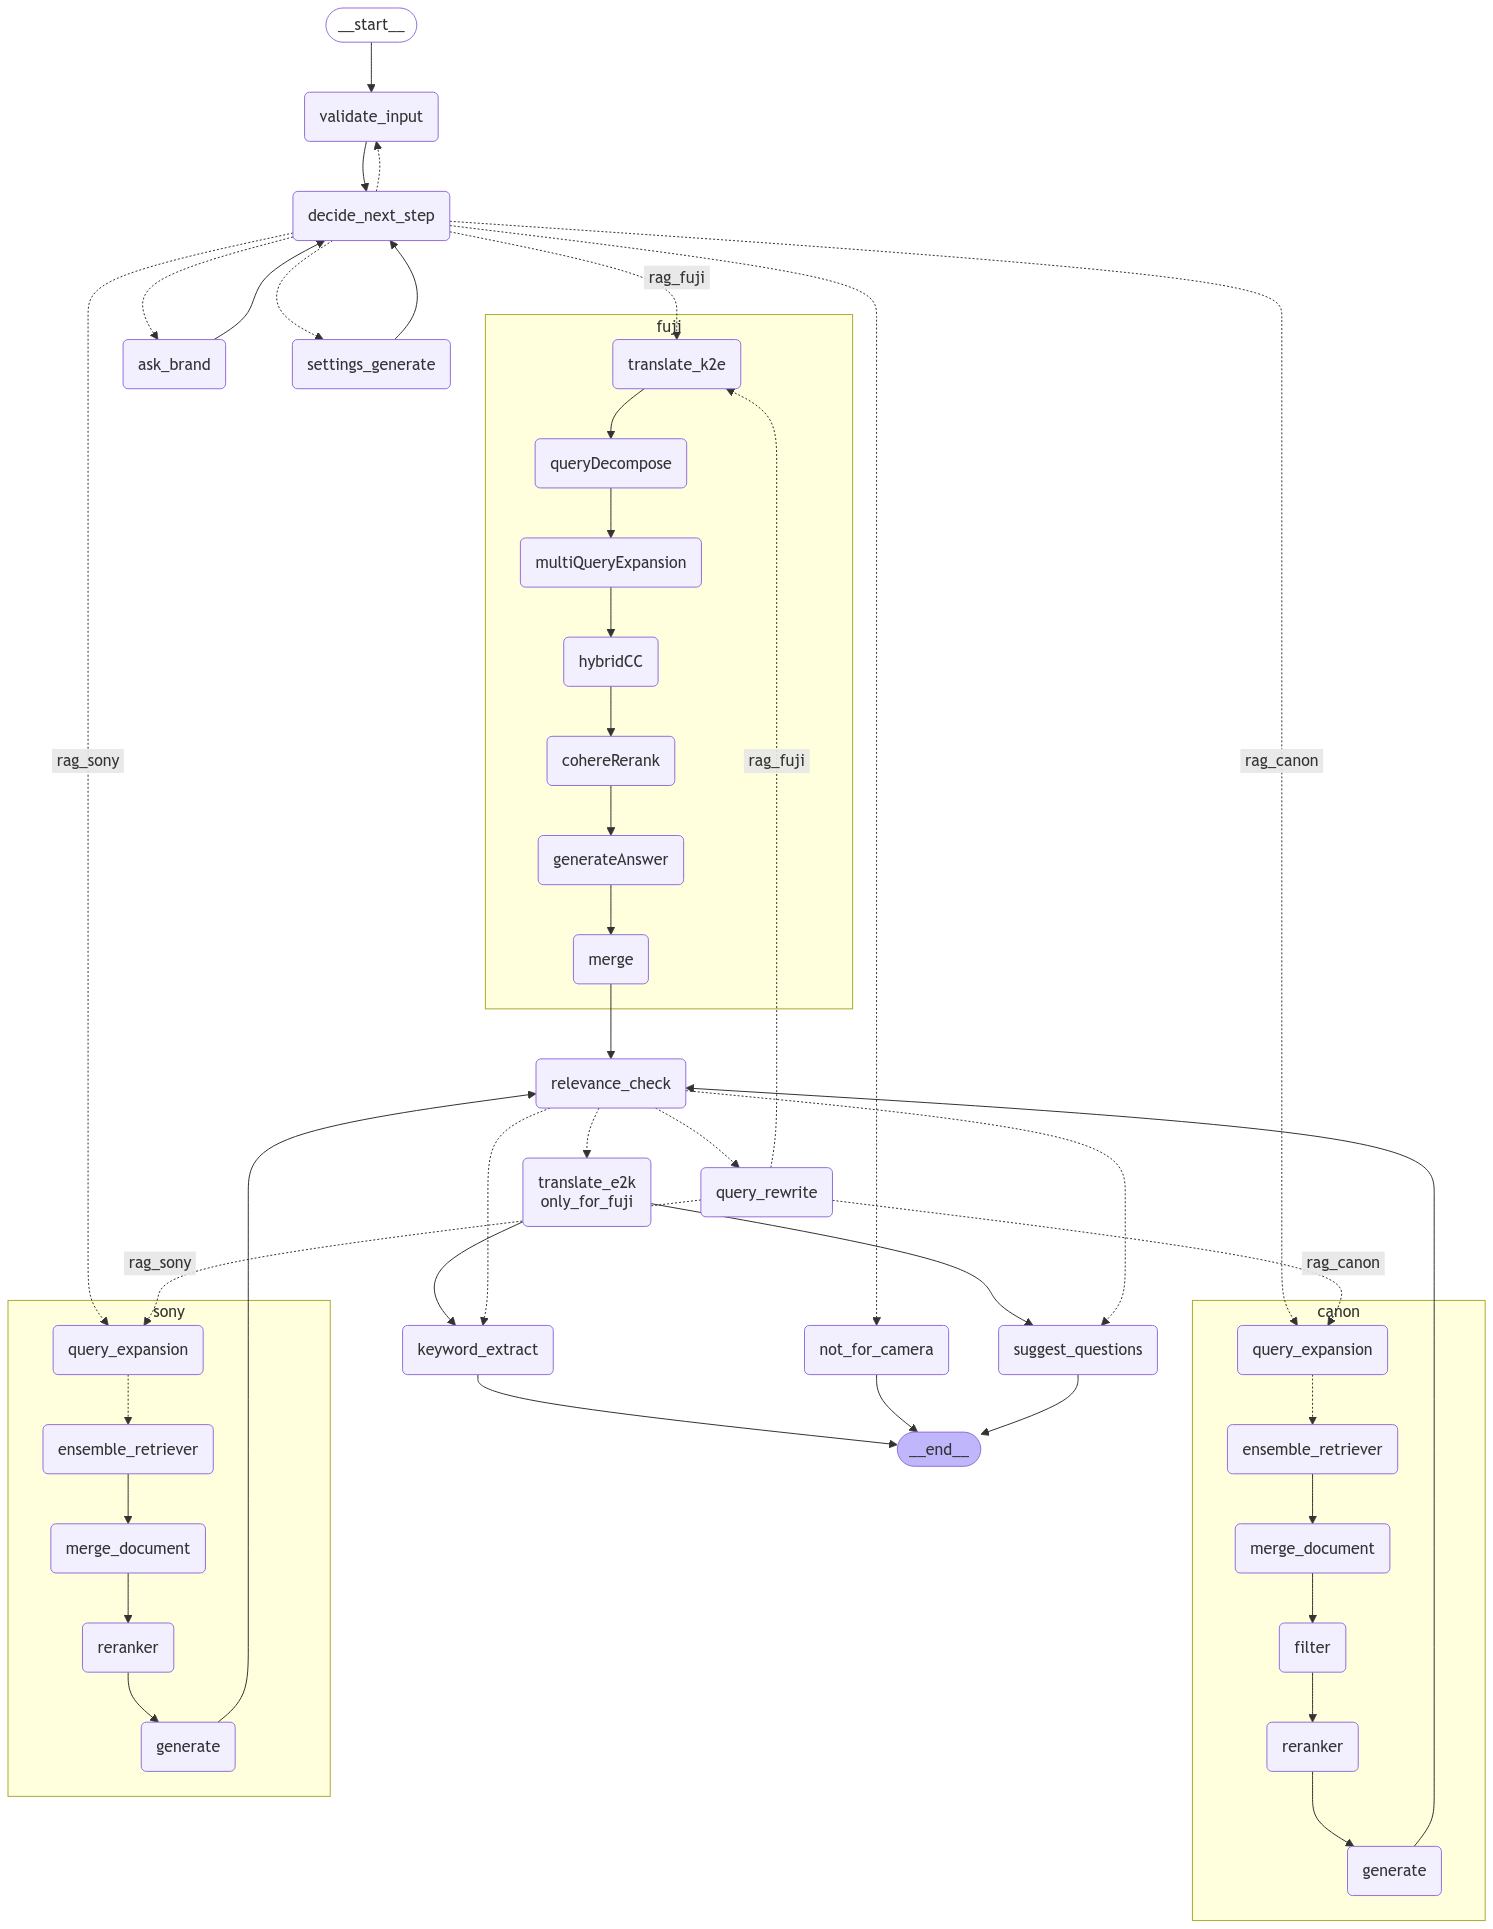

In [2]:
display(Image(app.get_graph(xray=True).draw_mermaid_png(output_file_path='./graph_node_route.png')))

# Compile app

[02/13/25 18:20:08] INFO     [__init__.py:81] >> You are using API version of AutoRAG.To use local   ]8;id=264733;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/__init__.py\__init__.py]8;;\:]8;id=52468;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/__init__.py#81\81]8;;\
                             version, run pip install 'AutoRAG[gpu]'                                               

                    INFO     [base.py:17] >> Initialize query expansion node - QueryDecompose module...  ]8;id=256923;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=58486;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#17\17]8;;\

                    INFO     [base.py:19] >> Initialize generator node - LlamaIndexLLM                   ]8;id=717000;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=586824;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#19\19]8;;\

                    INFO     [base.py:17] >> Initialize query expansion node - MultiQueryExpansion       ]8;id=381097;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=109507;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#17\17]8;;\
                             module...                                                                             

                    INFO     [base.py:19] >> Initialize generator node - LlamaIndexLLM                   ]8;id=502902;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=9276;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#19\19]8;;\

                    INFO     [config.py:54] >> PyTorch version 2.6.0 available.                        ]8;id=79151;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/datasets/config.py\config.py]8;;\:]8;id=615327;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/datasets/config.py#54\54]8;;\

[02/13/25 18:20:11] INFO     [base.py:64] >> You are using API version of AutoRAG.To use local version,  ]8;id=219983;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/embedding/base.py\base.py]8;;\:]8;id=958491;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/embedding/base.py#64\64]8;;\
                             run pip install 'AutoRAG[gpu]'                                                        

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=828841;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=416013;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=160909;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=697811;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into            ]8;id=951043;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=441198;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\
                             PineconeGRPC                                                                          

[02/13/25 18:20:13] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=261677;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=326428;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=834727;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=302672;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [base.py:18] >> Initialize retrieval node - BM25                            ]8;id=19453;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=555465;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#18\18]8;;\

[02/13/25 18:20:14] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=376851;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=374015;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=817325;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=295600;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=826532;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=697003;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

[02/13/25 18:20:15] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=935078;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=258783;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=840255;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=93283;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

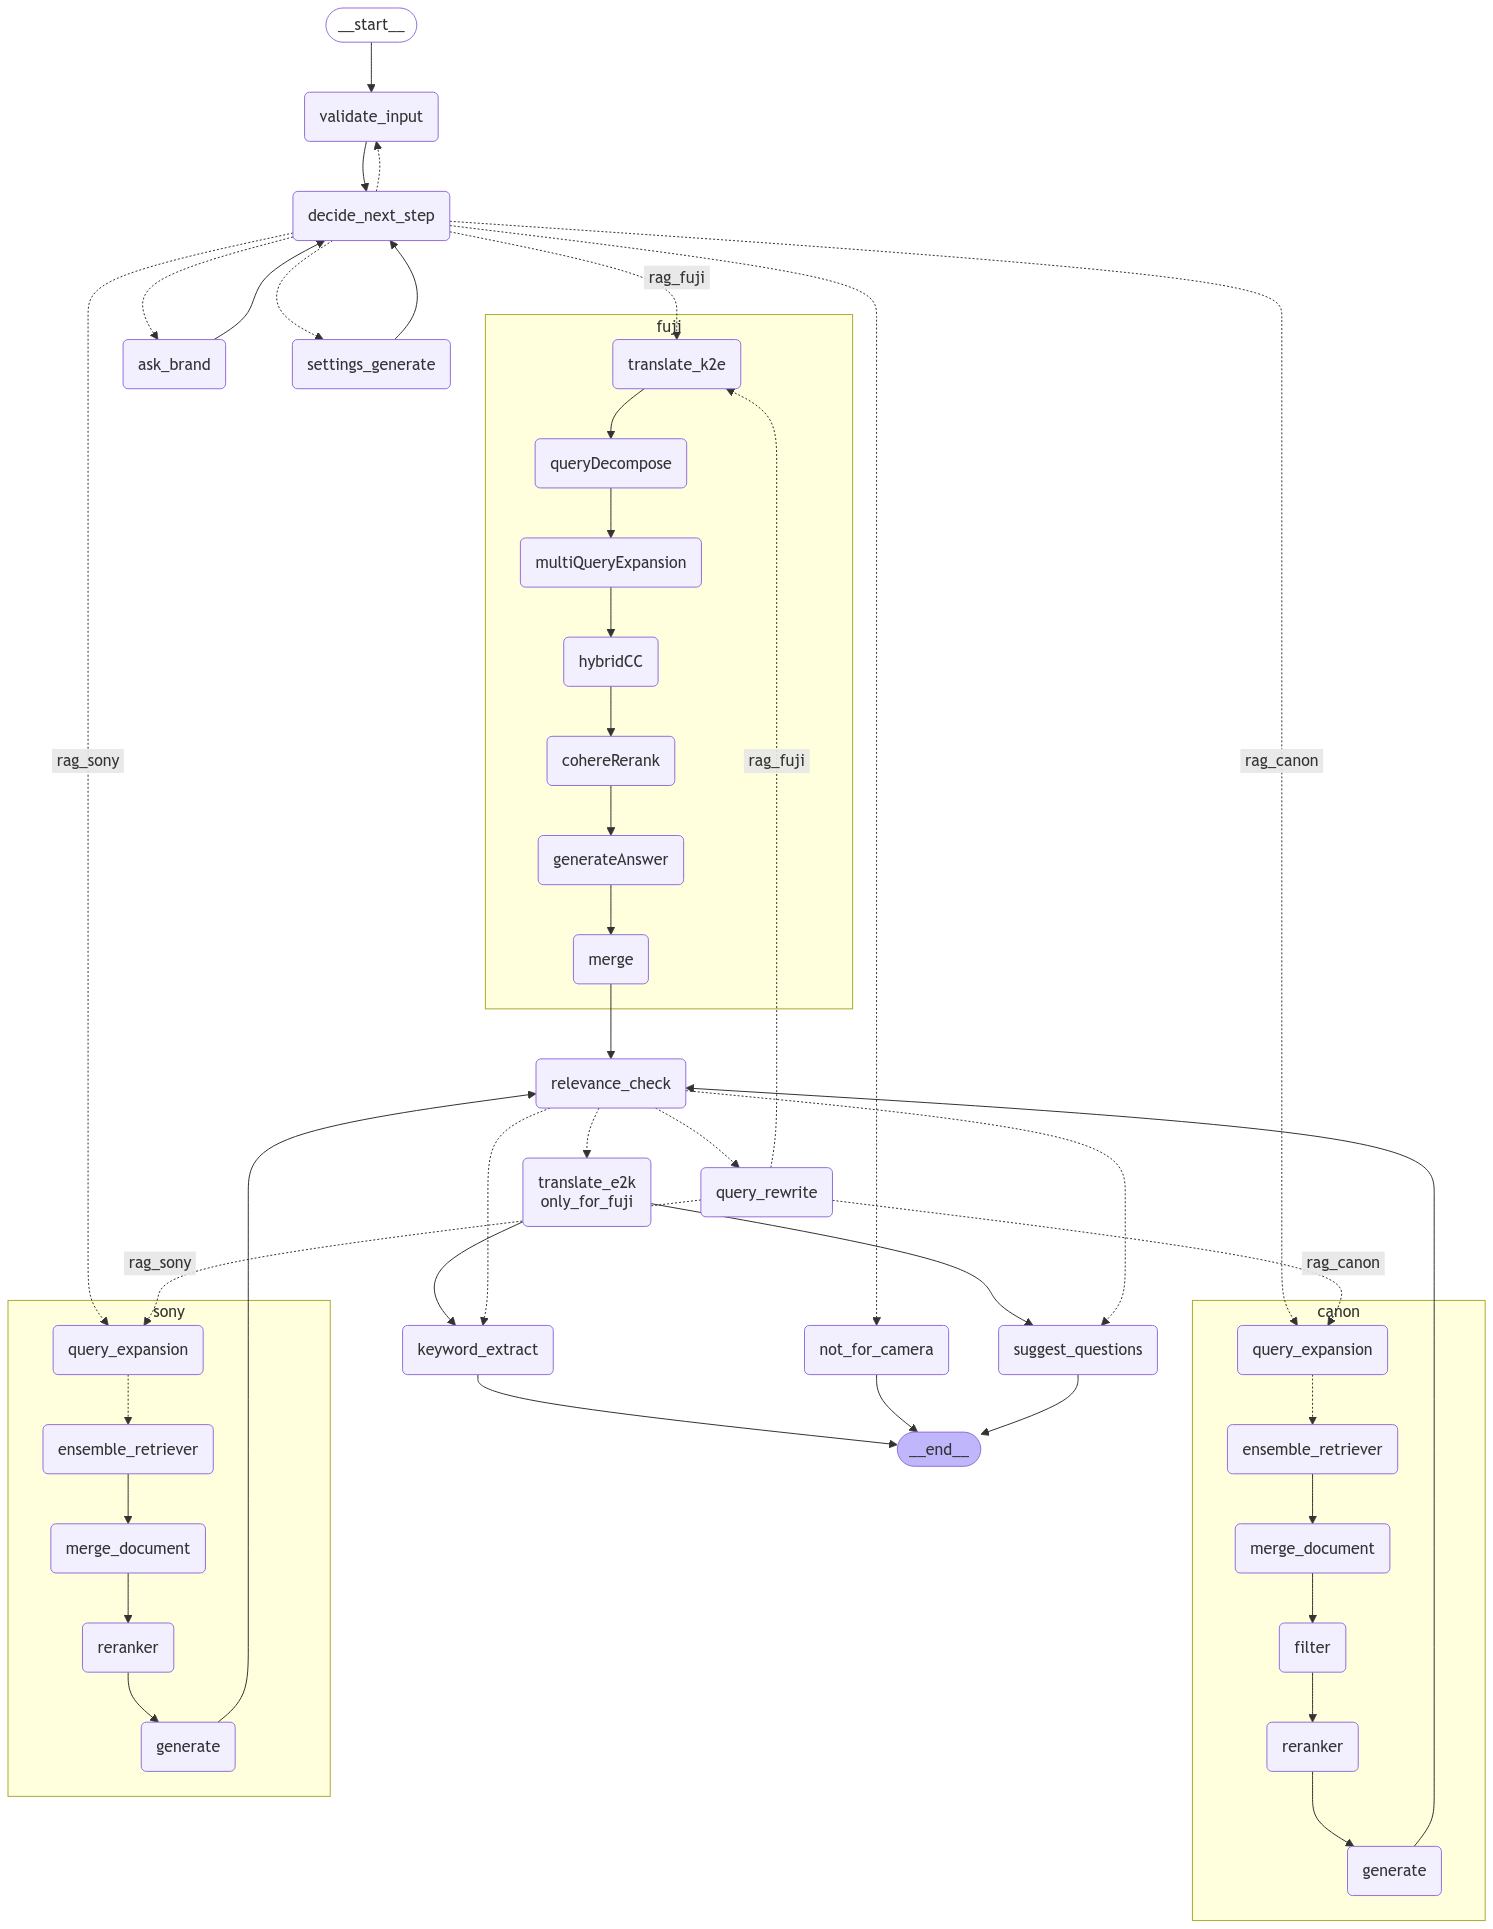

In [1]:
from domain.chat.lang_graph_merge.graph import app

from IPython.display import display, Image
display(Image(app.get_graph(xray=True).draw_mermaid_png()))
# display(Image(app.get_graph(xray=True).draw_mermaid_png(output_file_path='./graph_node_route.png')))

# Fuji

In [5]:
import asyncio
thread = {"configurable": {"thread_id": "1"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input={"question": "연속 촬영 하는 방법을 알려줘","brand": "fuji", "model": "x-t5", "sessionId": 1, "messageId": 1},config=thread, stream_mode=["custom"]):
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'check_validation_criteria(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:12] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=936850;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=492675;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'decide_next_step(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:13] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=847786;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=354615;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

translate_k2e노드: Tell me how to take continuous shots.


                    INFO     [base.py:31] >> Running query expansion node - QueryDecompose module...     ]8;id=283687;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=338166;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=579457;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=58289;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=334696;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=513157;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

queryDecompose노드
['Tell me how to take continuous shots.']


/home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[02/13/25 18:56:14] INFO     [base.py:31] >> Running query expansion node - MultiQueryExpansion          ]8;id=882142;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=603369;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\
                             module...                                                                             

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=481807;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=531437;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/13/25 18:56:15] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=472602;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=243738;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

/home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


multiQueryExpansion노드
[['Tell me how to take continuous shots.', 'How can I capture photos in burst mode?', 'What steps should I follow to shoot continuously?', 'How do I enable continuous shooting on my camera?']]
✅chunk from lang graph: ('custom', {'currentNode': '문서 검색 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=435900;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=398761;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:56:16] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=28975;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=843104;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:56:17] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=288433;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=466198;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:56:18] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=419519;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=695107;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [base.py:31] >> Running retrieval node - BM25 module...                     ]8;id=705084;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=254905;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#31\31]8;;\

hybridCC노드
[[['x-t5_page105', 'x-t5_page106', 'x-t5_page171', 'x-t5_page177', 'x-t5_page172', 'x-t5_page163', 'x-t5_page149', 'x-t5_page166', 'x-t5_page114', 'x-t5_page115'], ['x-t5_page105', 'x-t5_page106', 'x-t5_page171', 'x-t5_page177', 'x-t5_page178', 'x-t5_page55', 'x-t5_page118', 'x-t5_page53', 'x-t5_page298', 'x-t5_page166'], ['x-t5_page105', 'x-t5_page106', 'x-t5_page165', 'x-t5_page163', 'x-t5_page171', 'x-t5_page48', 'x-t5_page177', 'x-t5_page172', 'x-t5_page164', 'x-t5_page112'], ['x-t5_page105', 'x-t5_page106', 'x-t5_page174', 'x-t5_page260', 'x-t5_page171', 'x-t5_page207', 'x-t5_page177', 'x-t5_page382', 'x-t5_page299', 'x-t5_page28']]]
✅chunk from lang graph: ('custom', {'currentNode': '문서 정렬 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:19] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=296524;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=27329;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=327458;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=653055;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=324550;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=53203;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=671474;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=804650;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

cohere노드
[[[{'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 105, 'section': 'Continuous Shooting (Burst Mode)', 'subsection': ['Continuous Shooting (Burst Mode)']}, {'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 106, 'section': 'Continuous Shooting (Burst Mode)', 'subsection': ['Continuous Shooting (Burst Mode)']}, {'chapter': 'The Shooting Menus', 'model': 'x-t5', 'page': 163, 'section': 'SHOOTING SETTING (Still Photography)', 'subsection': ['DRIVE SETTING']}], [{'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 105, 'section': 'Continuous Shooting (Burst Mode)', 'subsection': ['Continuous Shooting (Burst Mode)']}, {'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 106, 'section': 'Continuous Shooting (Burst Mode)', 'subsection': ['Continuous Shooting (Burst Mode)']}, {'chapter': 'The Shooting Menus', 'model': 'x-t5', 'page': 171, 'section': 'SHOOTING SETTING (Still Photography)', 'subsection': ['INTERVAL TIMER SHOOTING']}], [{'chapter': 'Taking 

[02/13/25 18:56:20] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=566129;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=774088;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=794562;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=565139;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=905385;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=23714;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=815863;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=57858;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

generate노드
✅chunk from lang graph: ('custom', {'currentNode': 'merge(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:28] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=91251;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=763014;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'relevance_check(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:36] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=971334;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=591468;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.upstage.ai/v1/solar/chat/completions "HTTP/1.1 200 OK"                    

grounded
✅chunk from lang graph: ('custom', {'currentNode': 'translate_e2k(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:37] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=881230;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=517128;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': 'X', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '-T', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '5', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': ' 카', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '메', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '라', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '에서', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변

[02/13/25 18:56:48] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=11450;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=113768;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '키워드 추출 END', 'answer': '', 'keywords': ['Continuous Shooting (Burst Mode)', 'Drive Dial', 'Frame Advance Rate'], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:56:50] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=135621;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=347026;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '추천 질문 END', 'answer': '', 'keywords': [], 'suggestQuestions': ['연속 촬영 모드에서 플래시를 사용할 수 있는 방법이 있나요?', '연속 촬영 중 메모리 카드가 가득 찼을 때 자동으로 저장을 멈추지 않고 계속 촬영할 수 있는 방법이 있나요?', '연속 촬영 모드에서 프레임 전진 속도를 최적화하는 방법은 무엇인가요?'], 'sessionId': 1, 'messageId': 1})


In [3]:
from langgraph.types import Command
thread = {"configurable": {"thread_id": "1"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input=Command(resume="후지, xt5"),config=thread, stream_mode=["custom"]):  
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

result = sync_function()

✅chunk from lang graph: ('custom', {'currentNode': 'refine_question(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:38] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=237211;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=630188;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

user_response_analysis: brand='fuji' model='x-t5' newquestion=None reject_input=False
state: {'question': 'ISO 설정을 어떻게 해?', 'next_step': 'ask_brand', 'validation_results': {'camera_question': True, 'is_setting': True, 'choose_brand': False, 'choose_model': False}, 'sessionId': 1, 'messageId': 1}
state.get("model"): None
✅chunk from lang graph: ('custom', {'currentNode': 'decide_next_step(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:39] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=107642;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=671839;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

translate_k2e노드: How do I set the ISO?


                    INFO     [base.py:31] >> Running query expansion node - QueryDecompose module...     ]8;id=398991;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=750841;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=394128;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=712395;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/13/25 18:20:41] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=361560;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=309464;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

queryDecompose노드
['How do I set the ISO?']


/home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                    INFO     [base.py:31] >> Running query expansion node - MultiQueryExpansion          ]8;id=155887;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=689579;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\
                             module...                                                                             

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=791496;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=165569;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/13/25 18:20:42] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=621615;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=230350;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

/home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


multiQueryExpansion노드
[['How do I set the ISO?', 'How can I adjust the ISO setting?', 'What steps are needed to change the ISO?', 'Could you guide me on modifying the ISO?']]
✅chunk from lang graph: ('custom', {'currentNode': '문서 검색 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:43] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=624048;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=319985;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:20:45] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=825197;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=113346;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:20:46] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=24190;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=168441;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/13/25 18:20:47] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=87796;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=669345;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [base.py:31] >> Running retrieval node - BM25 module...                     ]8;id=85676;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=966628;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#31\31]8;;\

hybridCC노드
[[['x-t5_page175', 'x-t5_page228', 'x-t5_page203', 'x-t5_page97', 'x-t5_page132', 'x-t5_page162', 'x-t5_page96', 'x-t5_page296', 'x-t5_page316', 'x-t5_page202'], ['x-t5_page228', 'x-t5_page203', 'x-t5_page96', 'x-t5_page175', 'x-t5_page97', 'x-t5_page162', 'x-t5_page132', 'x-t5_page202', 'x-t5_page28', 'x-t5_page296'], ['x-t5_page132', 'x-t5_page228', 'x-t5_page277', 'x-t5_page227', 'x-t5_page175', 'x-t5_page249', 'x-t5_page203', 'x-t5_page133', 'x-t5_page163', 'x-t5_page244'], ['x-t5_page132', 'x-t5_page227', 'x-t5_page228', 'x-t5_page133', 'x-t5_page226', 'x-t5_page142', 'x-t5_page111', 'x-t5_page21', 'x-t5_page288', 'x-t5_page115']]]
✅chunk from lang graph: ('custom', {'currentNode': '문서 정렬 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=982475;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=877587;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

[02/13/25 18:20:48] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=624556;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=293876;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=873302;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=933708;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=686520;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=60198;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

cohere노드
[[[{'chapter': 'The Setup Menus', 'model': 'x-t5', 'page': 296, 'section': 'BUTTON/DIAL SETTING', 'subsection': ['COMMAND DIAL SETTING']}, {'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 96, 'section': 'Sensitivity', 'subsection': ['Sensitivity']}, {'chapter': 'The Shooting Menus', 'model': 'x-t5', 'page': 175, 'section': 'SHOOTING SETTING (Still Photography)', 'subsection': ['ISO AUTO SETTING', 'DIGITAL TELE-CONV.']}], [{'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 96, 'section': 'Sensitivity', 'subsection': ['Sensitivity']}, {'chapter': 'The Setup Menus', 'model': 'x-t5', 'page': 296, 'section': 'BUTTON/DIAL SETTING', 'subsection': ['COMMAND DIAL SETTING']}, {'chapter': 'Taking Photographs', 'model': 'x-t5', 'page': 97, 'section': 'Sensitivity', 'subsection': ['AUTO']}], [{'chapter': 'The Shooting Menus', 'model': 'x-t5', 'page': 175, 'section': 'SHOOTING SETTING (Still Photography)', 'subsection': ['ISO AUTO SETTING', 'DIGITAL TELE-CONV.']}, {'chapte

[02/13/25 18:20:49] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=737708;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=648988;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=921158;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=42257;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=812032;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=570162;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=202620;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=594713;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

generate노드
✅chunk from lang graph: ('custom', {'currentNode': 'merge(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:54] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=76623;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=407707;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'relevance_check(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:58] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=205903;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=700661;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.upstage.ai/v1/solar/chat/completions "HTTP/1.1 200 OK"                    

grounded
✅chunk from lang graph: ('custom', {'currentNode': 'translate_e2k(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:20:59] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=498273;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=890277;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '카', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '메', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '라', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': ' 모델', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': ' X', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '-T', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'answer': '5', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답

[02/13/25 18:21:04] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=432548;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=36531;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '키워드 추출 END', 'answer': '', 'keywords': ['Command Dial', 'ISO Sensitivity', 'Exposure Compensation'], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/13/25 18:21:05] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=303790;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=794535;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '추천 질문 END', 'answer': '', 'keywords': [], 'suggestQuestions': ['ISO 설정을 변경할 때 주의해야 할 점은 무엇인가요?', 'ISO 자동 설정에서 AUTO1, AUTO2, AUTO3의 차이점은 무엇인가요?', 'ISO 설정이 사진의 노이즈에 어떤 영향을 미치나요?'], 'sessionId': 1, 'messageId': 1})


In [2]:
import asyncio
thread = {"configurable": {"thread_id": "1"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input={"question": "ISO 설정을 어떻게 해?", "sessionId": 1, "messageId": 1},config=thread, stream_mode=["custom"]):
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'check_validation_criteria(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/12/25 18:29:29] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=683769;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=702951;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'decide_next_step(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'refine_question(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'refine_question', 'answer': '알고 싶은 카메라 브랜드가 있으신가요?  \nCanon, Fuji, Sony 중 하나를 선택하시거나, 원하지 않으시면 "없다"라고 입력해주세요.', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


In [ ]:
from langgraph.types import Command
thread = {"configurable": {"thread_id": "1"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input=Command(resume=""),config=thread, stream_mode=["custom"]):  
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

result = sync_function()

✅chunk from lang graph: ('custom', {'currentNode': 'refine_question(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


[02/12/25 18:29:48] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=456915;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=55367;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

user_response_analysis: brand='canon' model='EOS R50 Mark II' newquestion=None reject_input=False
state: {'question': 'ISO 설정을 어떻게 해?', 'brand': 'canon', 'next_step': 'ask_brand', 'validation_results': {'camera_question': True, 'is_setting': True, 'choose_brand': False, 'choose_model': False}, 'sessionId': 1, 'messageId': 1}
state.get("model"): None
✅chunk from lang graph: ('custom', {'currentNode': 'decide_next_step(확인을 위한 출력)', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '문서 검색 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
---[CANON] QUERY GENERTATE---


[02/12/25 18:29:49] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=532856;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=386349;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

---[CANON] ENSEMBLE RETRIEVE---
질문 : ISO 설정 방법은?
---[CANON] ENSEMBLE RETRIEVE---
질문 : ISO를 설정하는 방법은 무엇인가요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : ISO 설정은 어떻게 하나요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : ISO를 어떻게 설정할 수 있나요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : ISO 설정 절차는 어떻게 되나요?


[02/12/25 18:29:50] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=610606;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=356390;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=622954;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=36622;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=390812;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=809877;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=666722;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=330305;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=487387;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=221210;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[Document(id='chunk-r50-620', metadata={'brand': 'Canon', 'image_path': ['/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/r50/r50_page_605_1.png', '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/r50/r50_page_605_2.png'], 'index': '프린터에 WiFi로 연결하기', 'main_index': '통신 기능', 'model': 'R50', 'page': 605.0, 'pdf_path': '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/pdf/split_pdf_image/r50/r50_page_605.jpg', 'sub_index': 'N/A'}, page_content='## 인쇄 효과 설정하기 (이미지 최적화)\n\n![그림 자리(이미지 최적화 설정 화면)]\n\n1. ![이모티콘]을 선택하십시오.\n2. 인쇄 효과를 선택하십시오.\n\n**주의**\n- 확장 ISO 감도 (H)에서 촬영한 이미지에 대해 출력되는 촬영 정보에서 ISO 감도가 잘못 식별될 수 있습니다.\n- 인쇄 효과 및 기타 옵션에서 [기본설정]은 프린터 제조사에서 정한 기본 설정을 나타냅니다. [기본설정]에 관한 자세한 내용은 프린터의 사용 설명서를 참조하십시오.\n\n## 인쇄 매수 설정하기\n\n![그림 자리(인쇄 매수 설정 화면)]\n\n1. ![이모티콘]을 선택하십시오.\n2. 인쇄 매수를 선택하십시오.'), Document(id='chunk-m50-243', metadata={'brand': 'C

[02/12/25 18:29:51] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=464163;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=467559;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=206042;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=758918;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:52] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=423342;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=18000;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=193830;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=780473;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:53] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=248023;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=224112;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=183502;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=974049;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:54] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=330108;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=670451;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=578061;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=940616;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=971839;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=467560;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=182119;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=445751;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:55] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=260637;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=156156;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=861076;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=380450;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:56] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=387485;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=507040;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=489993;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=456608;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:57] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=519031;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=809303;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=351430;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=389274;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:58] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=866358;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=87720;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=691523;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=638892;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=338273;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=52841;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=971358;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=761432;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:29:59] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=204594;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=967213;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=661493;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=151737;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:00] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=311926;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=872251;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=742137;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=211521;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:01] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=761182;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=24042;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=802368;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=278699;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:02] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=40687;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=438871;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=348586;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=371416;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:03] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=198501;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=609748;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=359734;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=928480;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:04] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=511517;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=280743;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=655356;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=262347;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=492355;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=734978;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=570046;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=110767;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:06] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=415018;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=78046;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=411925;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=892270;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=786382;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=412098;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=274373;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=105118;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:07] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=777726;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=810183;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=657955;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=520871;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:08] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=188797;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=177799;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=146843;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=862216;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:09] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=995262;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=484092;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=838010;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=157504;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:10] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=567857;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=289674;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=986354;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=111814;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:11] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=289863;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=364939;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=770331;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=819444;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:12] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=616415;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=663384;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=681907;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=106798;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:13] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=553730;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=918940;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=268155;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=211738;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=756273;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=737291;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=471558;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=661352;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:14] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=281605;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=481420;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=735381;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=561965;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:15] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=76655;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=700409;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=998509;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=225904;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:16] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=355228;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=28969;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=367390;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=659391;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/12/25 18:30:17] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=791003;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=694708;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cpu                                                                                   

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=812546;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=224771;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/fastA                           
                             PI/domain/chat/lang_graph_merge/yoeun/models/ko-sbert-sts                             

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

필터링 전 문서 : 30 / 필터링 후 문서 : 6
✅chunk from lang graph: ('custom', {'currentNode': '문서 정렬 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
---[CANON] RERANK---


[02/12/25 18:30:18] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=834411;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=260714;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v1/rerank "HTTP/1.1 200 OK"                                    

[Document(id='chunk-m50-212', metadata={'brand': 'Canon', 'image_path': ['/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/m50/m50_page_215_1.png', '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/m50/m50_page_215_2.png'], 'index': '정지 사진의 ISO 감도 설정', 'main_index': '촬영', 'model': 'M50', 'page': 215.0, 'pdf_path': '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/pdf/split_pdf_image/m50/m50_page_215.jpg', 'sub_index': '정지 사진 촬영'}, page_content='## 2. ISO 감도를 설정합니다.\n\n![그림 자리(ISO 설정 화면)]\n\n- ◀ ▶ 키를 눌러 설정하십시오.\n- ISO 감도는 1/3스톱 단위로 ISO 100-25600 범위 내에서 설정할 수 있습니다.\n- [AUTO]를 선택하면 ISO 감도가 자동으로 설정됩니다.\n- [AUTO]를 선택했을 때 셔터 버튼을 반누름하면 실제로 설정된 ISO 감도가 표시됩니다.\n\n![그림 자리(ISO 감도 설정 화면)]\n\n- 위의 화면과 같이 ISO 감도 설정에서 [ISO 감도] 설정 시 [AUTO]로 지정하려면 <INFO> 버튼을 누르십시오.'), Document(id='chunk-200d-107', metadata={'brand': 'Canon', 'image_path': ['/Users/yoeu

[02/12/25 18:30:19] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=624388;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=827243;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': '', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': '카', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': '메', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': '라', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': '의', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'answer': ' ISO', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': '답변 생성 중', 'sessionId': 1, 'messageId': 1, 'ans

[02/12/25 18:30:23] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=375571;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=723635;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.upstage.ai/v1/solar/chat/completions "HTTP/1.1 200 OK"                    

grounded
---KEYWORD EXTRACT---
✅chunk from lang graph: ('custom', {'currentNode': '키워드 추출 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': '추천 질문 작성 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
---SUGGEST QUESTION---


[02/12/25 18:30:25] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=47470;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=701583;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '추천 질문 END', 'answer': '', 'keywords': [], 'suggestQuestions': ['ISO 감도를 설정할 때 주의해야 할 점은 무엇인가요?', 'ISO 감도를 자동으로 설정했을 때와 수동으로 설정했을 때의 차이점은 무엇인가요?', 'ISO 감도 외에 사진의 노이즈를 줄일 수 있는 다른 방법이 있나요?'], 'sessionId': 1, 'messageId': 1})


                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=565807;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=764146;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '키워드 추출 END', 'answer': '', 'keywords': ['ISO 감도', 'AUTO 설정', '다이얼'], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


In [6]:
import asyncio
thread = {"configurable": {"thread_id": "abcd"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input={"question": "자전거 타는 방법", "sessionId": 1, "messageId": 1},config=thread, stream_mode=["custom"]):
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

[02/10/25 18:09:35] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=275552;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=898061;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

brand=None model=None is_camera_related=False is_manual_related=False
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'not_for_camera', 'answer': '"자전거 타는 방법" 내용은 카메라에 대한 질문이 아니라 답변할 수 없습니다.', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


In [2]:
import asyncio
thread = {"configurable": {"thread_id": "abcd"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input={"question": "초점 조절 방법", "sessionId": 1, "messageId": 1},config=thread, stream_mode=["custom"]):
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

[02/10/25 14:21:54] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=61999;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=873405;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

brand=None model=None is_camera_related=True is_manual_related=True
✅chunk from lang graph: ('custom', {'currentNode': '질문 분석 중', 'answer': '', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
{'question': '초점 조절 방법', 'brand': None, 'model': None, 'next_step': 'ask_brand', 'validation_results': {'camera_question': True, 'is_setting': True, 'choose_brand': False}, 'sessionId': 1, 'messageId': 1}
✅chunk from lang graph: ('custom', {'currentNode': 'refine_question', 'answer': '알고 싶은 카메라 브랜드와 모델이 있으신가요?', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


# Canon

In [2]:
import asyncio
thread = {"configurable": {"thread_id": "abcd"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input={"question": "초점을 어떻게 조절해?", "sessionId": 1, "messageId": 1},config=thread, stream_mode=["custom"]):
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

[02/09/25 04:34:32] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=53858;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=820452;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': '질문 분석중', 'answer': '질문 분석중', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
✅chunk from lang graph: ('custom', {'currentNode': 'decide_next_step', 'answer': 'decide_next_step', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
{'question': '초점을 어떻게 조절해?', 'next_step': 'ask_brand', 'validation_results': {'camera_question': True, 'is_setting': True, 'choose_brand': None}, 'sessionId': 1, 'messageId': 1}
✅chunk from lang graph: ('custom', {'currentNode': 'reverseQ', 'answer': '알고 싶은 카메라 브랜드와 모델이 있으신가요?', 'keywords': [], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})


In [6]:
from langgraph.types import Command
thread = {"configurable": {"thread_id": "abcd"}}
def sync_function():
    async def run():
        async for chunk in app.astream(input=Command(resume="canon"),config=thread, stream_mode=["custom"]):  
            print(f"✅chunk from lang graph: {chunk}")

    asyncio.run(run()) 

sync_function()

{'question': '초점을 어떻게 조절해?', 'brand': 'canon', 'next_step': 'ask_brand', 'validation_results': {'camera_question': True, 'is_setting': True, 'choose_brand': None}, 'sessionId': 1, 'messageId': 1}
---[CANON] QUERY GENERTATE---


[02/09/25 04:02:41] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=963931;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=546156;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

---[CANON] ENSEMBLE RETRIEVE---
질문 : 초점 조절 방법은 무엇인가요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : 어떻게 하면 초점을 맞출 수 있나요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : 초점을 조정하는 절차는 어떻게 되나요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : 초점 조절을 위한 팁이 있나요?
---[CANON] ENSEMBLE RETRIEVE---
질문 : 초점 조정에 필요한 도구는 무엇인가요?


                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=106891;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=558400;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=163805;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=792986;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=32494;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=629328;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=169827;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=672483;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=241684;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=905655;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=725504;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=322904;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=801431;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=457596;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=845074;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=164337;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=434448;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=349646;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=817547;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=595123;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=332189;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=487055;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=475311;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=663586;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=464477;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=21985;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=89170;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=679528;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=889054;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=47355;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=272008;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=320663;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=579273;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=143617;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=892993;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=821851;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=841950;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=756799;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=811178;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=532497;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=180746;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=45073;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=82357;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=819775;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=598930;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=753498;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=115717;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=752891;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=518014;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=261731;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=23944;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=534152;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=315703;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=314824;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=470852;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=590095;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=139879;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=539501;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=674221;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=42739;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=807018;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=507334;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=198958;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=62022;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=251774;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=48553;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAG_env/lib/python3.12/site-packages/pineco                                  
                             ne_plugins'])                                                                         

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=342857;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=512823;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=603113;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=760498;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

[02/09/25 04:02:42] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=619217;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=713495;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=201869;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=255070;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/09/25 04:02:43] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=109141;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=398279;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=956871;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=124837;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=709892;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=143055;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

---DOCUMENT FILTERING---


[02/09/25 04:02:54] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=684074;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=386878;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=753448;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=63379;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=658409;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=914024;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=514843;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=421424;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:02:59] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=530059;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=915284;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=352407;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=862013;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=891188;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=214954;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=597465;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=400189;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:00] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=249025;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=2052;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=597317;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=486024;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=394580;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=516490;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=171346;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=408224;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:01] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=23737;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=25924;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=366894;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=217721;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=634292;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=105703;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=963163;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=948612;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:02] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=991591;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=728229;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=569184;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=423995;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=611544;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=358316;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=482992;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=959240;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=76664;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=610544;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=877502;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=629251;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:03] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=176865;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=652430;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=104740;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=605095;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=55517;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=656699;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=860388;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=639738;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:04] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=143478;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=867769;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=187006;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=867726;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=46122;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=965732;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=740876;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=313366;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:05] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=184450;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=526530;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=893700;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=916884;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=692254;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=414958;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=576830;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=9659;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=720516;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=631446;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=995324;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=395792;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:06] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=653059;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=703825;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=297129;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=675333;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=574311;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=363262;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=569672;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=927986;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:07] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=368309;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=792298;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=817851;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=540235;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=800975;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=860306;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=102125;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=140012;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:08] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=215272;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=739166;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=565227;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=788383;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=683238;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=382895;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=697388;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=15137;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:09] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=497421;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=256844;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=427861;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=3240;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=723834;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=600937;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=730240;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=519370;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=645798;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=97875;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=750633;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=989317;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:10] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=212965;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=750539;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=821389;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=267794;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=237821;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=652718;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=216748;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=496708;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:11] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=394259;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=657775;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=770003;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=916428;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=867463;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=721273;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=463889;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=450405;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:12] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=85801;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=329341;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=897626;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=1989;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=814986;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=575493;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=262590;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=433865;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:13] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=166068;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=520663;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=364130;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=810857;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                    INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=760361;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=403528;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=602719;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=804630;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[02/09/25 04:03:14] INFO     [SentenceTransformer.py:210] >> Use pytorch device_name:    ]8;id=539966;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=409127;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#210\210]8;;\
                             cuda                                                                                  

                    INFO     [SentenceTransformer.py:218] >> Load pretrained             ]8;id=569802;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py\SentenceTransformer.py]8;;\:]8;id=733383;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py#218\218]8;;\
                             SentenceTransformer:                                                                  
                             /home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/fastAPI/domain/                           
                             chat/lang_graph_merge/yoeun/models/ko-sbert-sts                                       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

필터링 전 문서 : 35 / 필터링 후 문서 : 7
---[CANON] RERANK---


[02/09/25 04:03:15] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=216851;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=827709;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v1/rerank "HTTP/1.1 200 OK"                                    

[Document(id='chunk-m50-151', metadata={'brand': 'Canon', 'image_path': ['/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/m50/m50_page_155_1.png'], 'index': '수동 초점', 'main_index': 'AF, 드라이브 및 노출 설정', 'model': 'M50', 'page': 155.0, 'pdf_path': '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/pdf/split_pdf_image/m50/m50_page_155.jpg', 'sub_index': 'N/A'}, page_content='# 수동 초점\n\n자동 초점으로 초점을 맞출 수 없는 경우에는 아래의 과정을 수행하여 수동으로 초점을 맞추십시오.\n\n1. ![그림 자리(초점 모드를 MF로 설정합니다.)]\n\n   - 렌즈의 포커싱 링을 돌려 대략적인 초점을 설정하십시오.'), Document(id='chunk-r50-450', metadata={'brand': 'Canon', 'image_path': [], 'index': '수동 초점', 'main_index': 'AF/드라이브', 'model': 'R50', 'page': 438.0, 'pdf_path': '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/pdf/split_pdf_image/r50/r50_page_438.jpg', 'sub_index': 'N/A'}, page_content='### 4. 초점을 수동으로 맞춥니다.\n\n- 확대된 이미지를 보면서 렌즈 포커싱 링을 돌

[02/09/25 04:03:17] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=545956;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=3187;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': '', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': '초', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': '점을', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': ' 조', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': '절', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 1, 'answer': '하는', 'keywords': [], 'suggestQuestions': []})
✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'sessionId': 1, 'messageId': 

[02/09/25 04:03:19] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=607108;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=426603;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.upstage.ai/v1/solar/chat/completions "HTTP/1.1 200 OK"                    

grounded
---KEYWORD EXTRACT---


[02/09/25 04:03:21] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=472244;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=695254;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'answer': '', 'keywords': ['수동 초점', '포커싱 링', '초점 모드'], 'suggestQuestions': [], 'sessionId': 1, 'messageId': 1})
---SUGGEST QUESTION---


[02/09/25 04:03:23] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=328069;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=54706;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

✅chunk from lang graph: ('custom', {'currentNode': 'generate', 'answer': '', 'keywords': ['수동 초점', '포커싱 링', '초점 모드'], 'suggestQuestions': ['수동 초점 모드에서 자동 초점 모드로 전환하는 방법은 무엇인가요?', '수동 초점 모드에서 촬영 시 주의해야 할 점은 무엇인가요?', '초점 조절 시 확대 보기 기능을 사용하는 방법은 무엇인가요?'], 'sessionId': 1, 'messageId': 1})


In [11]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()

# 📌 Pydantic 데이터 모델 정의
class CameraQuestionAnalysis(BaseModel):
    brand: str | None
    model: str | None
    is_camera_related: bool
    is_manual_related: bool

# 📌 지원되는 브랜드 및 모델 목록 (RAG 시스템에서 검색 가능한 대상)
VALID_BRANDS = {"canon", "sony", "fuji"}
VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "GFX100II": "fuji",
    "X-E4": "fuji",
    "X-S20": "fuji",
    "X-T5": "fuji",
    "X100V": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}

# 📌 LLM 프롬프트 실행
completion = client.beta.chat.completions.parse(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": (
                "You are an expert in analyzing user questions for a camera manual-based RAG system. "
                "Your primary task is to process a given user query and extract structured information based on predefined rules.\n\n"
                "### Input Elements:\n"
                "- **question**: The user's input question.\n"
                "- **brand** (optional): The provided camera brand.\n"
                "- **model** (optional): The provided camera model.\n\n"
                "### Rules for Extraction:\n"
                "1. If the **brand** and **model** are explicitly mentioned in the question, extract them.\n"
                "2. The system supports **only three camera brands** for document retrieval: canon, sony, fuji.\n"
                "3. Each brand has a predefined set of supported models:\n"
                f"{VALID_MODELS}\n\n"
                "4. If the extracted **brand** and **model** are not in the predefined list, return `null` for both.\n\n"
                "### Intent Analysis:\n"
                "You must determine the user's intent by classifying the question into two categories:\n"
                "- `is_camera_related`: **true** if the question is related to cameras, **false** otherwise.\n"
                "- `is_manual_related`: **true** if the question pertains to settings/configurations that can be found in a camera manual, **false** otherwise.\n\n"
                "### Output Format:\n"
                "Return the result in JSON format:\n"
                "{\n"
                '  "brand": "Extracted brand or null",\n'
                '  "model": "Extracted model or null",\n'
                '  "is_camera_related": true/false,\n'
                '  "is_manual_related": true/false\n'
                "}\n\n"
                "### Examples:\n"
                "#### Example 1: Question with Supported Brand and Model\n"
                "##### Input:\n"
                "{\n"
                '  "question": "How do I adjust the shutter speed on a Canon EOS R6?",\n'
                '  "brand": null,\n'
                '  "model": null\n'
                "}\n"
                "##### Output:\n"
                "{\n"
                '  "brand": "canon",\n'
                '  "model": "EOS R6",\n'
                '  "is_camera_related": true,\n'
                '  "is_manual_related": true\n'
                "}\n\n"
                "#### Example 2: Question with Unsupported Brand\n"
                "##### Input:\n"
                "{\n"
                '  "question": "How does the autofocus work on a Nikon D750?",\n'
                '  "brand": null,\n'
                '  "model": null\n'
                "}\n"
                "##### Output:\n"
                "{\n"
                '  "brand": null,\n'
                '  "model": null,\n'
                '  "is_camera_related": true,\n'
                '  "is_manual_related": false\n'
                "}\n\n"
                "#### Example 3: Non-Camera Related Question\n"
                "##### Input:\n"
                "{\n"
                '  "question": "What\'s the best way to take night photos on an iPhone?",\n'
                '  "brand": null,\n'
                '  "model": null\n'
                "}\n"
                "##### Output:\n"
                "{\n"
                '  "brand": null,\n'
                '  "model": null,\n'
                '  "is_camera_related": false,\n'
                '  "is_manual_related": false\n'
                "}\n\n"
                "### Final Note:\n"
                "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
                "- Follow the given brand and model constraints strictly."
            ),
        },
        {
            "role": "user",
            "content": '{"question": "How do I change the ISO on my Sony a7III?", "brand": null, "model": null}'
        }
    ],
    response_format=CameraQuestionAnalysis,
)

# 📌 결과 저장 및 출력
question_analysis = completion.choices[0].message.parsed
print(question_analysis)


[02/10/25 12:32:55] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=428307;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=681294;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

brand='sony' model='ILCE-7M3 a7III' is_camera_related=True is_manual_related=True


In [10]:
question_analysis

CameraQuestionAnalysis(brand=None, model=None, is_camera_related=True, is_manual_related=True)

In [ ]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()

# 📌 Pydantic 데이터 모델 정의
class CameraQuestionAnalysis(BaseModel):
    brand: str | None
    model: str | None
    is_camera_related: bool
    is_manual_related: bool

# 📌 지원되는 브랜드 및 모델 목록 (RAG 시스템에서 검색 가능한 대상)
VALID_BRANDS = {"canon", "sony", "fuji"}


VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "GFX100II": "fuji",
    "X-E4": "fuji",
    "X-S20": "fuji",
    "X-T5": "fuji",
    "X100V": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}

completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are an expert in analyzing user questions for a camera manual-based RAG system. "
                    "Your primary task is to process a given user query and extract structured information based on predefined rules.\n\n"
                    "### Input Elements:\n"
                    "- **question**: The user's input question.\n"
                    "- **brand** (optional): The provided camera brand.\n"
                    "- **model** (optional): The provided camera model.\n\n"
                    "### Rules for Extraction:\n"
                    "1. If the **brand** and **model** are explicitly mentioned in the question, extract them.\n"
                    "2. The system supports **only three camera brands** for document retrieval: canon, sony, fuji.\n"
                    "3. Each brand has a predefined set of supported models:\n"
                    f"{VALID_MODELS}\n\n"
                    "4. If the extracted **brand** and **model** are not in the predefined list, return `null` for both.\n\n"
                    "### Intent Analysis:\n"
                    "You must determine the user's intent by classifying the question into two categories:\n"
                    "- `is_camera_related`: **true** if the question is related to cameras, **false** otherwise.\n"
                    "- `is_manual_related`: **true** if the question pertains to settings/configurations that can be found in a camera manual, **false** otherwise.\n\n"
                    "### Output Format:\n"
                    "Return the result in JSON format:\n"
                    "{\n"
                    '  "brand": "Extracted brand or null",\n'
                    '  "model": "Extracted model or null",\n'
                    '  "is_camera_related": true/false,\n'
                    '  "is_manual_related": true/false\n'
                    "}\n\n"
                    "### Examples:\n"
                    "#### Example 1: Question with Supported Brand and Model\n"
                    "##### Input:\n"
                    "{\n"
                    '  "question": "How do I adjust the shutter speed on a Canon EOS R6?",\n'
                    '  "brand": null,\n'
                    '  "model": null\n'
                    "}\n"
                    "##### Output:\n"
                    "{\n"
                    '  "brand": "canon",\n'
                    '  "model": "EOS R6",\n'
                    '  "is_camera_related": true,\n'
                    '  "is_manual_related": true\n'
                    "}\n\n"
                    "#### Example 2: Question with Unsupported Brand\n"
                    "##### Input:\n"
                    "{\n"
                    '  "question": "How does the autofocus work on a Nikon D750?",\n'
                    '  "brand": null,\n'
                    '  "model": null\n'
                    "}\n"
                    "##### Output:\n"
                    "{\n"
                    '  "brand": null,\n'
                    '  "model": null,\n'
                    '  "is_camera_related": true,\n'
                    '  "is_manual_related": false\n'
                    "}\n\n"
                    "#### Example 3: Non-Camera Related Question\n"
                    "##### Input:\n"
                    "{\n"
                    '  "question": "What\'s the best way to take night photos on an iPhone?",\n'
                    '  "brand": null,\n'
                    '  "model": null\n'
                    "}\n"
                    "##### Output:\n"
                    "{\n"
                    '  "brand": null,\n'
                    '  "model": null,\n'
                    '  "is_camera_related": false,\n'
                    '  "is_manual_related": false\n'
                    "}\n\n"
                    "### Final Note:\n"
                    "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
                    "- Follow the given brand and model constraints strictly."
                ),
            },
            {
                "role": "user",
                "content": f'''
"question": "후지 카메라의 초점 조절하는 방법을 알려줘"
"brand": {None}
"model": {None}
'''
            }
        ],
        response_format=CameraQuestionAnalysis,
    )

question_analysis = completion.choices[0].message.parsed

[02/10/25 13:05:55] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=596688;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=297711;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [7]:
type(VALID_BRANDS)

set

In [8]:
("ㅁㄴㅇㅁㄴㅇ"
 "ㅂㅈㄷㅂㅈㄷㅂㅈ"
 "123123")

'ㅁㄴㅇㅁㄴㅇㅂㅈㄷㅂㅈㄷㅂㅈ123123'

In [5]:
question_analysis

CameraQuestionAnalysis(brand=None, model=None, is_camera_related=True, is_manual_related=True)

In [18]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()

# 📌 Pydantic 데이터 모델 정의
class CameraQuestionAnalysis(BaseModel):
    brand: str | None
    model: str | None
    is_camera_related: bool
    is_manual_related: bool

# 📌 지원되는 브랜드 및 모델 목록 (RAG 시스템에서 검색 가능한 대상)
VALID_BRANDS = {"canon", "sony", "fuji"}


VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "GFX100II": "fuji",
    "X-E4": "fuji",
    "X-S20": "fuji",
    "X-T5": "fuji",
    "X100V": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}
completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": (
                            "You are an expert in analyzing user questions for a camera manual-based RAG system. "
                            "Your primary task is to process a given user query and extract structured information based on predefined rules.\n\n"
                            "### Input Elements:\n"
                            "- **question**: The user's input question.\n"
                            "- **brand** (optional): The provided camera brand.\n"
                            "- **model** (optional): The provided camera model.\n\n"
                            "### Rules for Extraction:\n"
                            "1. If the **brand** and **model** are explicitly mentioned in the question, extract them.\n"
                            "2. The system supports **only three camera brands** for document retrieval: canon, sony, fuji.\n"
                            "3. Each brand has a predefined set of supported models:\n"
                            f"{VALID_MODELS}\n\n"
                            "4. If the extracted **brand** and **model** are not in the predefined list, return `null` for each.\n\n"
                            "### Brand Normalization:\n"
                            "To ensure consistent brand extraction, convert brand names to match `VALID_BRANDS`. "
                            "This includes handling variations in spelling, capitalization, and language (Korean/English).\n"
                            "- Canon (캐논, 캐논카메라, CANON, canon) → `canon`\n"
                            "- Sony (소니, SONY, sony) → `sony`\n"
                            "- Fujifilm (후지, 후지필름, FUJIFILM, fuji) → `fuji`\n"
                            "If the brand name does not match the above mappings, return `null`.\n\n"
                            "### Intent Analysis:\n"
                            "You must determine the user's intent by classifying the question into two categories:\n"
                            "- `is_camera_related`: **true** if the question is related to cameras, **false** otherwise.\n"
                            "- `is_manual_related`: **true** if the question pertains to settings/configurations that can be found in a camera manual, **false** otherwise.\n\n"
                            "### Output Format:\n"
                            "Return the result in JSON format:\n"
                            "{\n"
                            '  "brand": "Extracted brand or null",\n'
                            '  "model": "Extracted model or null",\n'
                            '  "is_camera_related": true/false,\n'
                            '  "is_manual_related": true/false\n'
                            "}\n\n"
                            "### Final Note:\n"
                            "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
                            "- Follow the given brand and model constraints strictly."
                        )
            },
            {
                "role": "user",
                "content": f'''
"question": "후지 카메라의 x-s40 초점 조절하는 방법을 알려줘"
"brand": {None}
"model": {None}
'''
            }
        ],
        response_format=CameraQuestionAnalysis,
    )

question_analysis = completion.choices[0].message.parsed

[02/10/25 13:26:27] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=279790;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=261005;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [19]:
question_analysis

CameraQuestionAnalysis(brand='fuji', model=None, is_camera_related=True, is_manual_related=True)

In [17]:
question_analysis

CameraQuestionAnalysis(brand=None, model=None, is_camera_related=True, is_manual_related=True)

In [2]:
class CameraQuestionAnalysis(BaseModel):
    brand: str | None
    model: str | None
    is_camera_related: bool
    is_manual_related: bool

VALID_BRANDS = {"canon", "sony", "fuji"}
VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "gfx100ii": "fuji",
    "x-e4": "fuji",
    "x-s20": "fuji",
    "x-t5": "fuji",
    "x100v": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}
completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": (
                            "You are an expert in analyzing user questions for a camera manual-based RAG system. "
                            "Your primary task is to process a given user query and extract structured information based on predefined rules.\n\n"
                            "### Input Elements:\n"
                            "- **question**: The user's input question.\n"
                            "- **brand** (optional): The provided camera brand.\n"
                            "- **model** (optional): The provided camera model.\n\n"
                            "### Rules for Extraction:\n"
                            "1. If the **brand** and **model** are explicitly mentioned in the question, extract them.\n"
                            "2. The system supports **only three camera brands** for document retrieval: canon, sony, fuji.\n"
                            "3. Each brand has a predefined set of supported models:\n"
                            f"{VALID_MODELS}\n\n"
                            "4. If the extracted **brand** and **model** are not in the predefined list, return `null` for each.\n\n"
                            "### Brand Normalization:\n"
                            "To ensure consistent brand extraction, convert brand names to match `VALID_BRANDS`. "
                            "This includes handling variations in spelling, capitalization, and language (Korean/English).\n"
                            "- Canon (캐논, 캐논카메라, CANON, canon) → `canon`\n"
                            "- Sony (소니, SONY, sony) → `sony`\n"
                            "- Fujifilm (후지, 후지필름, FUJIFILM, fuji) → `fuji`\n"
                            "If the brand name does not match the above mappings, return `null`.\n\n"
                            "### Intent Analysis:\n"
                            "You must determine the user's intent by classifying the question into two categories:\n"
                            "- `is_camera_related`: **true** if the question is related to cameras, **false** otherwise.\n"
                            "- `is_manual_related`: **true** if the question pertains to settings/configurations that can be found in a camera manual, **false** otherwise.\n\n"
                            "### Output Format:\n"
                            "Return the result in JSON format:\n"
                            "{\n"
                            '  "brand": "Extracted brand or null",\n'
                            '  "model": "Extracted model or null",\n'
                            '  "is_camera_related": true/false,\n'
                            '  "is_manual_related": true/false\n'
                            "}\n\n"
                            "### Final Note:\n"
                            "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
                            "- Follow the given brand and model constraints strictly."
                        )
            },
            {
                "role": "user",
                "content": f'''
"question": {state["question"]}
"brand": {state.get('brand', None)}
"model": {state.get('model', None)}
'''
            }
        ],
        response_format=CameraQuestionAnalysis,
    )

    question_analysis = completion.choices[0].message.parsed

NameError: name 'BaseModel' is not defined

In [9]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()

# 📌 Pydantic 데이터 모델 정의
class UserQueryAnalysis(BaseModel):
    brand: str | None
    model: str | None
    newquestion: str | None

# 📌 지원되는 브랜드 및 모델 목록
VALID_BRANDS = {"canon", "sony", "fuji"}
VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "gfx100ii": "fuji",
    "x-e4": "fuji",
    "x-s20": "fuji",
    "x-t5": "fuji",
    "x100v": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}

completion = client.beta.chat.completions.parse(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": (
                "You are an expert in analyzing user responses for a camera manual-based RAG system. "
                "Your task is to process user input from a follow-up question where they were asked to provide a brand or model.\n\n"
                "### Input Elements:\n"
                "- **brand** (optional): The previously provided camera brand.\n"
                "- **model** (optional): The previously provided camera model.\n"
                "- **query**: The user's response to the follow-up question asking for a brand or model.\n\n"
                "### Rules for Extraction:\n"
                "1. If the response contains a valid brand, extract and return it.\n"
                "2. If the response contains a valid model, extract and return it.\n"
                "3. If the response does not contain a valid brand or model but instead contains a new question, return it under `newquestion`.\n"
                "4. The system supports only three brands: `canon`, `sony`, `fuji`.\n"
                "5. If the extracted brand or model is not in the predefined list, return `null`.\n\n"
                "### Brand Normalization:\n"
                "Ensure the extracted brand matches one of `VALID_BRANDS`. "
                "Convert variations in spelling, capitalization, and language (Korean/English) as follows:\n"
                "- Canon (캐논, CANON, canon) → `canon`\n"
                "- Sony (소니, SONY, sony) → `sony`\n"
                "- Fujifilm (후지, 후지필름, FUJIFILM, fuji) → `fuji`\n"
                "If the brand name does not match these, return `null`.\n\n"
                "### Intent Recognition:\n"
                "If the user's response is unrelated to brands or models and appears to be a completely new question, "
                "extract it and return it under `newquestion`. Otherwise, return `null` for `newquestion`.\n\n"
                "### Output Format:\n"
                "{\n"
                '  "brand": "Extracted brand or null",\n'
                '  "model": "Extracted model or null",\n'
                '  "newquestion": "Extracted new question or null"\n'
                "}\n\n"
                "### Final Note:\n"
                "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
                "- Follow the given brand and model constraints strictly."
            )
        },
        {
            "role": "user",
            "content": f'''
"brand": {"fuji"}
"model": {None}
"query": "원하는 브랜드가 없다"
'''
        }
    ],
    response_format=UserQueryAnalysis,
)

user_response_analysis = completion.choices[0].message.parsed

print(user_response_analysis)


[02/10/25 15:25:05] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=201866;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=127751;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

brand=None model=None newquestion=None


In [8]:
user_response_analysis

UserQueryAnalysis(brand=None, model=None, newquestion='자전거 타는 방법을 알려줘')

In [8]:
from openai import OpenAI

client = OpenAI()

# 📌 지원되는 브랜드 및 모델 목록
VALID_BRANDS = {"canon", "sony", "fuji"}
VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "gfx100ii": "fuji",
    "x-e4": "fuji",
    "x-s20": "fuji",
    "x-t5": "fuji",
    "x100v": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}

from pydantic import BaseModel
from typing import Optional

class UserQueryAnalysis(BaseModel):
    brand: Optional[str]  # 추출된 브랜드 (없으면 None)
    model: Optional[str]  # 추출된 모델 (없으면 None)
    newquestion: Optional[str]  # 새로운 질문이 들어온 경우 (없으면 None)
    reject_input: bool  # 사용자가 브랜드/모델 입력을 거부했는지 여부

# 📌 LLM 실행

In [ ]:
from openai import OpenAI

client = OpenAI()

# 📌 지원되는 브랜드 및 모델 목록
VALID_BRANDS = {"canon", "sony", "fuji"}
VALID_MODELS = {
    "EOS 200D II": "canon",
    "EOS M50 Mark II": "canon",
    "EOS R50 Mark II": "canon",
    "EOS R6": "canon",
    "PowerShot G7X Mark III": "canon",
    "gfx100ii": "fuji",
    "x-e4": "fuji",
    "x-s20": "fuji",
    "x-t5": "fuji",
    "x100v": "fuji",
    "ILCE-6400 a6400": "sony",
    "ILCE-7M3 a7III": "sony",
    "DSC-RX100M7": "sony",
    "ZV-1": "sony",
    "ZV-E10": "sony",
}

from pydantic import BaseModel
from typing import Optional

class UserQueryAnalysis(BaseModel):
    brand: Optional[str]  # 추출된 브랜드 (없으면 None)
    model: Optional[str]  # 추출된 모델 (없으면 None)
    newquestion: Optional[str]  # 새로운 질문이 들어온 경우 (없으면 None)
    reject_input: bool  # 사용자가 브랜드/모델 입력을 거부했는지 여부

# 📌 LLM 실행


completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=[
            {
    "role": "system",
    "content": (
        "You are an expert in analyzing user responses for a camera manual-based RAG system. "
        "Your task is to process user input from a follow-up question where they were asked to provide a brand or model.\n\n"
        "### Input Elements:\n"
        "- **originalquestion**: The user's initial question before requesting a brand/model.\n"
        "- **brand** (optional): The previously provided camera brand.\n"
        "- **model** (optional): The previously provided camera model.\n"
        "- **query**: The user's response regarding the brand or model.\n\n"
        "### Rules for Extraction:\n"
        "- Extract and return the brand if it is valid.\n"
        f"  - VALID_BRANDS: {VALID_BRANDS}\n"
        "- Extract and return the model if it is valid.\n"
        f"  - VALID_MODELS: {VALID_MODELS}\n"
        "- If the response does not contain a valid brand or model but includes a new question, set it under `newquestion`.\n"
        "- If the user explicitly refuses to provide a brand or model (e.g., 'I don't have a preferred brand'),\n"
        "  set `reject_input` to `true` and return `null` for `brand` and `model`.\n\n"
        "### Brand Normalization:\n"
        "Ensure extracted brands match `VALID_BRANDS`. Normalize spelling, capitalization, and language variations:\n"
        "- Canon (캐논, CANON, canon) → `canon`\n"
        "- Sony (소니, SONY, sony) → `sony`\n"
        "- Fujifilm (후지, 후지필름, FUJIFILM, fuji) → `fuji`\n\n"
        "### Intent Recognition:\n"
        "- Compare `originalquestion` and `query`:\n"
        "  1. If the topic remains the same but with a different brand or model, set `newquestion` and reset `brand` and `model`.\n"
        "  2. If the `query` introduces a completely different topic, extract it and return it under `newquestion`.\n"
        "  3. If `query` is irrelevant to camera topics, return `null` for `brand`, `model`, and `newquestion`.\n\n"
        "### Output Format:\n"
        "{\n"
        '  "brand": "Extracted brand or null",\n'
        '  "model": "Extracted model or null",\n'
        '  "newquestion": "Extracted new question or null",\n'
        '  "reject_input": true/false\n'
        "}\n\n"
        "### Final Note:\n"
        "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
        "- Follow the given brand and model constraints strictly."
    )
},
{
    "role": "user",
    "content": f'''
"originalquestion": {originalquestion}
"brand": {brand}
"model": {None}
"query": {query}
'''
}
        ],
        response_format=UserQueryAnalysis,
    )

user_response_analysis = completion.choices[0].message.parsed

#     # ✅ 사용자가 입력 거부 시 현재 정보만 RAG 노드로 전달
#     if user_response_analysis.reject_input:
#         return {"brand": brand, "model": model, "proceed_to_rag": True}

#     return user_response_analysis

# # ✅ 테스트 실행
# example_output = process_user_input(
#     originalquestion="후지 카메라에서 ISO 설정을 변경하는 방법이 궁금합니다.",
#     brand=None,
#     model=None,
#     query="원하는 브랜드가 없습니다"
# )

# print(example_output)


[02/10/25 16:31:22] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=734754;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=881749;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [23]:
user_response_analysis

UserQueryAnalysis(brand='sony', model=None, newquestion=None, reject_input=False)

In [21]:
if not user_response_analysis.newquestion:
    print("hi")

hi


In [ ]:
from openai import OpenAI

client = OpenAI()
completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=[
            {
    "role": "system",
    "content": (
        "You are an expert in analyzing user responses for a camera manual-based RAG system. "
        "Your task is to process user input from a follow-up question where they were asked to provide a brand or model.\n\n"
        "### Input Elements:\n"
        "- **originalquestion**: The user's initial question before requesting a brand/model.\n"
        "- **brand** (optional): The previously provided camera brand.\n"
        "- **model** (optional): The previously provided camera model.\n"
        "- **query**: The user's response regarding the brand or model.\n\n"
        "### Rules for Extraction:\n"
        "- Extract and return the brand if it is valid.\n"
        f"  - VALID_BRANDS: {VALID_BRANDS}\n"
        "- Extract and return the model if it is valid.\n"
        f"  - VALID_MODELS: {VALID_MODELS}\n"
        "- If the response does not contain a valid brand or model but includes a new question, set it under `newquestion`.\n"
        "- If the user explicitly refuses to provide a brand or model (e.g., 'I don't have a preferred brand'),\n"
        "  set `reject_input` to `true` and return `null` for `brand` and `model`.\n\n"
        "### Brand Normalization:\n"
        "Ensure extracted brands match `VALID_BRANDS`. Normalize spelling, capitalization, and language variations:\n"
        "- Canon (캐논, CANON, canon) → `canon`\n"
        "- Sony (소니, SONY, sony) → `sony`\n"
        "- Fujifilm (후지, 후지필름, FUJIFILM, fuji) → `fuji`\n\n"
        "### Intent Recognition:\n"
        "- Compare `originalquestion` and `query`:\n"
        "  1. If the topic remains the same but with a different brand or model, set `newquestion` and reset `brand` and `model`.\n"
        "  2. If the `query` introduces a completely different topic, extract it and return it under `newquestion`.\n"
        "  3. If the `query` is **not related to cameras at all** (e.g., about food, weather, or other non-camera topics), return `null` for `brand`, `model`, and `newquestion`.\n\n"
        "### Output Format:\n"
        "{\n"
        '  "brand": "Extracted brand or null",\n'
        '  "model": "Extracted model or null",\n'
        '  "newquestion": "Extracted new question or null",\n'
        '  "reject_input": true/false\n'
        "}\n\n"
        "### Final Note:\n"
        "- Do **not** modify, interpret, or add explanations to the extracted data.\n"
        "- Follow the given brand and model constraints strictly."
    )
},
{
    "role": "user",
    "content": f'''
"originalquestion": "카메라 초점 조절하는 방법을 알려줘"
"brand": "fuji"
"model": {None}
"query": ""
'''
},
        ],
        response_format=UserQueryAnalysis,
    )

user_response_analysis = completion.choices[0].message.parsed

[02/10/25 18:02:46] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=621578;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=401080;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [14]:
user_response_analysis


UserQueryAnalysis(brand=None, model=None, newquestion='메모리 카드 분리 하는 방법을 알려줘', reject_input=False)

# sony

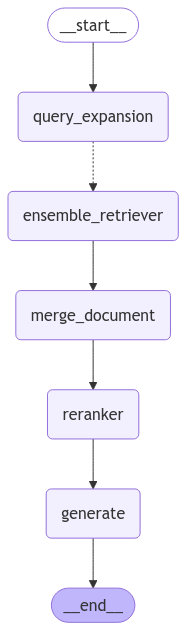

In [1]:
from domain.chat.lang_graph_merge.hyeseo.graph import subgraph_sony

subgraph_sony

In [2]:
a = subgraph_sony.invoke(input={"question": "메모리 카드 제거하는 방법을 알려줘"})

---[SONY] QUERY GENERTATE---
메모리 카드 제거하는 방법을 알려줘
['```json', '[', '    "메모리 카드를 안전하게 제거하는 방법은 무엇인가요?",', '    "메모리 카드를 빼는 절차를 설명해 주세요.",', '    "메모리 카드 제거 시 주의사항은 무엇인가요?",', '    "메모리 카드를 어떻게 분리할 수 있나요?",', '    "메모리 카드를 꺼내는 방법을 알려주세요."', ']', '```']
---[SONY] ENSEMBLE RETRIEVE---
질문 : ```json
---[SONY] ENSEMBLE RETRIEVE---
질문 : [
---[SONY] ENSEMBLE RETRIEVE---
질문 :     "메모리 카드를 안전하게 제거하는 방법은 무엇인가요?",
---[SONY] ENSEMBLE RETRIEVE---
질문 :     "메모리 카드를 빼는 절차를 설명해 주세요.",
---[SONY] ENSEMBLE RETRIEVE---
질문 :     "메모리 카드 제거 시 주의사항은 무엇인가요?",
---[SONY] ENSEMBLE RETRIEVE---
질문 :     "메모리 카드를 어떻게 분리할 수 있나요?",
---[SONY] ENSEMBLE RETRIEVE---
질문 :     "메모리 카드를 꺼내는 방법을 알려주세요."
---[SONY] ENSEMBLE RETRIEVE---
질문 : ]
---[SONY] ENSEMBLE RETRIEVE---
질문 : ```
]
[Document(id='page-unknown-83', metadata={'brand': 'Sony', 'model': 'a6400', 'page': 'unknown'}, page_content='자동 지우기 | | | 연속 AF 영역 표시 | | | AF 미세 조정 | | | AF 시스템 (정지 이미지) | | | AF 조리개 드라이브 (정지 이미지) | | # 수동 초점 | 수동 초점 | 수동 초점 | | --- | --- | | 직접 

TypeError: No synchronous function provided to "generate".
Either initialize with a synchronous function or invoke via the async API (ainvoke, astream, etc.)

In [6]:
a

{'question': '메모리 카드 제거하는 방법을 알려줘',
 'transform_question': {'lines': ['메모리 카드를 어떻게 제거하나요?',
   '메모리 카드 제거 절차를 설명해 주세요.',
   '메모리 카드를 안전하게 빼는 방법은?',
   '메모리 카드를 빼려면 어떻게 해야 하나요?',
   '메모리 카드 제거 시 주의사항은 무엇인가요?']},
 'multi_context': [Document(id='chunk-42', metadata={'brand': 'Canon', 'image_path': ['/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/r50/r50_page_47_1.png', '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/image/r50/r50_page_47_2.png'], 'index': '배터리 및 카드 삽입/제거하기', 'main_index': '준비 및 기본 조작', 'model': 'R50', 'page': 47, 'pdf_path': '/Users/yoeun/Library/Mobile Documents/com~apple~CloudDocs/github/FINAL Project/parse&chunk/data/pdf/split_pdf_image/r50/r50_page_47.jpg', 'sub_index': 'N/A'}, page_content='### 3. 카드를 제거합니다.\n\n![그림 자리(카드를 가볍게 눌렀다 놓으면 카드가 나옵니다.)]\n\n- 카드를 뺀 다음 커버를 닫아 주십시오.\n\n**주의**\n- 촬영 시 적색 [ ![이모티콘] ] 아이콘이 표시된 직후에는 카드를 제거하지 마십시오. 카메라의 내부 온도가 높아 카드가 뜨거울 수 있습니다. 

In [1]:
from dotenv import load_dotenv


dotenv_path = "./domain/chat/lang_graph_merge/hyeseo/.env"
# dotenv_path = "./domain/chat/lang_graph_merge/yoeun/.env"
load_dotenv(dotenv_path=dotenv_path, override=True)

import os
# print(os.getenv("PINECONE_API_KEY"))

In [5]:
import time
from pinecone.grpc import PineconeGRPC as Pinecone
from pinecone import ServerlessSpec

pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

spec = ServerlessSpec(cloud="aws", region="us-east-1")

index_name = 'sony'

# check if index already exists (it shouldn't if this is your first run)
if index_name not in pc.list_indexes().names():
    print("에러")
    pass
    # if does not exist, create index
    # pc.create_index(
    #     index_name,
    #     dimension=1536,  # dimensionality of text-embed-3-small
    #     metric='dotproduct',
    #     spec=spec
    # )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
index.describe_index_stats()

[02/12/25 18:10:06] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=284556;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=536669;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=410164;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=447368;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into            ]8;id=793315;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=487762;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\
                             PineconeGRPC                                                                          

[02/12/25 18:10:07] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=916512;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=300142;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=738416;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=810591;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 129}, 'a7m3': {'vector_count': 0}},
 'total_vector_count': 129}

In [6]:
from openai import OpenAI

client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)

# MODEL = documents[0].metadata['embedding_model']
MODEL = 'text-embedding-3-small'
query = "뭐지?"

xq = client.embeddings.create(input=query, model=MODEL).data[0].embedding
res = index.query(xq, top_k=1, include_metadata=True)

[02/12/25 18:10:24] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=815813;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=631140;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

In [7]:
res

{'matches': [{'id': 'page-unknown-80',
              'metadata': {'brand': 'Sony',
                           'context': '자동 지우기 | | | 연속 AF 영역 표시 | | | AF 미세 조정 '
                                      '| | | AF 시스템 (정지 이미지) | | | AF 조리개 드라이브 '
                                      '(정지 이미지) | | # 수동 초점 | 수동 초점 | 수동 초점 | '
                                      '| --- | --- | | 직접 수동 초점 (DMF) | | | '
                                      '초점부분확대 | | | MF 도우미 (정지 이미지) | | | 초점 '
                                      '확대 시간 | | | 초기 배율 (정지 이미지) | | | 피킹 설정 '
                                      '| | # 드라이브 모드 (연속 촬영/셀프타이머) 선택 | 드라이브 '
                                      '모드 | | --- | | 연속 촬영 | | 연속 촬영 남은 시간 '
                                      '지시등 표시하기 (연속 촬영 길이) | | 셀프타이머 | | '
                                      '셀프타이머(연속) | | 연속 브래킷 | | 단일 브래킷 | | 브래킷 '
                                      '촬영 중의 지시등 | | WB 브래킷 | | DRO 브래킷 | | '
                                      '브래킷 설정 |

In [38]:
query_result = index.query(
    xq,
    top_k=1,
    include_metadata=True,
    namespace="sony"  # 특정 네임스페이스 지정
)

print(query_result)


{'matches': [{'id': 'page-unknown-80',
              'metadata': {'brand': 'Sony',
                           'context': '자동 지우기 | | | 연속 AF 영역 표시 | | | AF 미세 조정 '
                                      '| | | AF 시스템 (정지 이미지) | | | AF 조리개 드라이브 '
                                      '(정지 이미지) | | # 수동 초점 | 수동 초점 | 수동 초점 | '
                                      '| --- | --- | | 직접 수동 초점 (DMF) | | | '
                                      '초점부분확대 | | | MF 도우미 (정지 이미지) | | | 초점 '
                                      '확대 시간 | | | 초기 배율 (정지 이미지) | | | 피킹 설정 '
                                      '| | # 드라이브 모드 (연속 촬영/셀프타이머) 선택 | 드라이브 '
                                      '모드 | | --- | | 연속 촬영 | | 연속 촬영 남은 시간 '
                                      '지시등 표시하기 (연속 촬영 길이) | | 셀프타이머 | | '
                                      '셀프타이머(연속) | | 연속 브래킷 | | 단일 브래킷 | | 브래킷 '
                                      '촬영 중의 지시등 | | WB 브래킷 | | DRO 브래킷 | | '
                                      '브래킷 설정 |

In [33]:
res

{'matches': [], 'namespace': '', 'usage': {'read_units': 1}}

In [4]:
import os
import json
from typing import List
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import BaseOutputParser

import os
import dill
import cohere
from dotenv import load_dotenv
from pinecone import Pinecone
from kiwipiepy import Kiwi
from sentence_transformers import SentenceTransformer
from langchain_openai import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore
from langchain.retrievers import EnsembleRetriever

In [8]:
pinecone_api = os.environ["PINECONE_API_KEY"]
pc = Pinecone(api_key=pinecone_api)
index_name = "sony"
index = pc.Index(index_name)
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = PineconeVectorStore(embedding=embeddings, index=index)
# retriever load
retriever = vector_store.as_retriever(
    search_type="similarity", search_kwargs={"k": 10},
)

[02/12/25 18:25:21] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=493206;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=79598;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=217666;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=184802;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into Pinecone   ]8;id=28414;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=134919;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\

                    INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=501584;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=486498;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/temp_file/git/SKN05-F                                  
                             INAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packa                                  
                             ges/pinecone_plugins'])                                                               

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=32889;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=966814;file:///home/jeongho/temp_file/git/SKN05-FINAL-1TEAM/jeongho/RAG_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

In [6]:
retriever

VectorStoreRetriever(tags=['PineconeVectorStore', 'OpenAIEmbeddings'], vectorstore=<langchain_pinecone.vectorstores.PineconeVectorStore object at 0x7acba95a5250>, search_kwargs={'k': 10})

Below is an example of a structured prompt that you could provide to a multimodal LLM (via the OpenAI API) to accomplish the alignment task. Tailor it as needed for your specific workflow and environment.

---

## System / Role Prompt

You are a helpful AI assistant with multimodal capabilities. You can analyze both text and images to align references in text with the corresponding images.  

Your goal is to:  
1. Receive text extracted from a camera manual (via Llama Parse), which contains Markdown references to images (placeholders).  
2. Receive images extracted from the camera manual (via Upstage Parse), each with its own filename.  
3. Match each image reference in the text to the correct image file by analyzing the visual and contextual content.  
4. Replace the original Markdown image placeholders with updated text that includes a short descriptive label (e.g., "Front View of the Camera") **and** the correct filename from the extracted images.  

You should return the updated Markdown text with the correct, descriptive image references.

## User Prompt

**Context and Instructions**:

1. **Overview**  
   - We have pages of text extracted using Llama Parse, which contain placeholders referencing images in Markdown syntax (e.g., `![fig1](...)` or similar).  
   - We also have the corresponding images extracted using Upstage Parse, each with a unique filename.  
   - Unfortunately, the image references from Llama Parse do not align with the actual image files from Upstage Parse.  
   - We need to fix this alignment so that each placeholder in the text refers to the correct image file and includes a short descriptive label.

2. **Data Provided**  
   - **Text (Markdown format)**  
     - This text may be segmented by pages. Each page’s text might contain multiple image references, such as:  
       ```
       Page 1:
       Lorem ipsum...  
       ![fig1](image-placeholder.jpg)  
       Lorem ipsum...  
       ![fig2](another-placeholder.jpg)  
       ...
       ```
   - **Images**  
     - For each page, you have access to:  
       1. The original page image (scanned or photographed from the manual).  
       2. Individually extracted images (e.g., diagrams, product photos) from that page.  
     - Each extracted image has a unique filename, such as `page1_imageA.jpg`, `page1_imageB.jpg`, etc.

3. **What You Should Do**  
   - **Step A**: Read the text for the current page. Identify all Markdown references to images.  
   - **Step B**: Analyze the actual images provided (the original page image plus each extracted image file).  
   - **Step C**: Match each Markdown image placeholder to the appropriate extracted image based on visual similarity or context.  
     - For instance, if the text says "Front View," look for an image that appears to be a front view of the camera.  
     - If the text references "Menu Screen," look for the image that shows a menu screen.  
   - **Step D**: Generate a descriptive label for the image (in a few words) and pair it with the correct filename from the extracted set.  
   - **Step E**: Replace the original Markdown placeholder in the text with the new syntax, e.g.:  
     ```
     ![Front View of the Camera (page1_imageA.jpg)](page1_imageA.jpg)
     ```
     or any format you decide, as long as it includes both a short descriptive text and the correct filename.  
   - **Step F**: Return the entire page text with all image references updated accordingly.

4. **Output Format**  
   - The final output should be the page text in Markdown, with each `![placeholder]` replaced by the correct image reference.  
   - Preserve all the original text structure, paragraphs, bullet points, etc. Only change the lines where an image reference appears.

5. **Assumptions and Notes**  
   - If you cannot determine which image should replace a given placeholder (e.g., there is no obvious match), provide your best guess and note any ambiguity.  
   - If there are more placeholders in the text than extracted images, or vice versa, handle the best possible alignment and note any unmatched items.  

## Example Input (for a single page)

1. **Page Text** (from Llama Parse)  
   ```
   Page 2:
   Here is the shutter button.  
   ![fig1](placeholder-fig1.jpg)  
   Here is the camera’s LCD monitor showing the main menu.  
   ![fig2](placeholder-fig2.jpg)
   ```

2. **Upstage Extracted Images**  
   - Filenames:  
     - `page2_imageA.jpg`  
     - `page2_imageB.jpg`  
   - Visual notes (for illustration only, in an actual multimodal system you’d have the images themselves):  
     - `page2_imageA.jpg` shows a close-up of the shutter button.  
     - `page2_imageB.jpg` shows the LCD screen with the main menu.

## Example Output

```
Page 2:
Here is the shutter button.  
![Close-up of the shutter button (page2_imageA.jpg)](page2_imageA.jpg)

Here is the camera’s LCD monitor showing the main menu.  
![LCD monitor with main menu (page2_imageB.jpg)](page2_imageB.jpg)
```

---

### Final Prompt to the LLM

1. **System Role Instruction**  
   *(Provided via a system message, or as a lead-in to the conversation, to ensure the assistant follows these steps.)*

> You are a multimodal AI assistant. Use both the provided text (Llama Parse results) and images (Upstage Parse results) to align image references accurately.  
> 
> **Steps**:  
> 1. Identify all Markdown image placeholders in the text.  
> 2. Analyze the provided images, looking for the ones that match each placeholder based on context or visual similarity.  
> 3. Generate a short descriptive text for each matched image and replace the placeholder in Markdown with the new descriptive label plus the correct image filename.  
> 4. Return the entire updated Markdown text.

2. **User Message / Prompt**  
   *(Your main user prompt that includes the data for a single page. This is where you feed in the text, the images, and any additional context.)*

> **Page Text (Markdown)**  
> ```
> [Insert the Llama Parse text for the current page here]
> ```  
>  
> **Extracted Images**  
> ```
> [List of filenames / Provide the images to the multimodal model]
> ```  
>  
> Please analyze the images and update every `![...](...)` in the text above with the correct descriptive label and filename. Return the updated page text in Markdown format.

---

Use the above structure as your blueprint to craft the final prompt for each page of your camera manual. Make sure to keep the format consistent, preserve all the original text, and only replace the image references with correct filenames and brief, meaningful descriptions.